In [21]:
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPSegModel

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)


In [33]:
import torch
import torchvision 
import torchvision.transforms as T

resize = T.Resize((224, 224))



In [34]:
inputs = processor(
    text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True
)
inputs['pixel_values'] = resize(inputs['pixel_values'])

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) 

/home/sangbeom/venv/adas/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


In [9]:
image = image.resize((224, 224))
print(image.size)

(224, 224)


In [39]:
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPSegModel

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegModel.from_pretrained("CIDAS/clipseg-rd64-refined")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")
inputs['pixel_values'] = resize(inputs['pixel_values'])

image_features = model.get_image_features(**inputs)

In [ ]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests
tp = T.ToTensor()
processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")


/home/sangbeom/venv/adas/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


torch.Size([1, 224, 224])


In [112]:

url = "610297_207036_2423.jpg"
image = Image.open(url)
texts = ["find all lanes"]
inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")
inputs['pixel_values'] = resize(inputs['pixel_values'])

outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)


torch.Size([1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.774556..1.6823343].


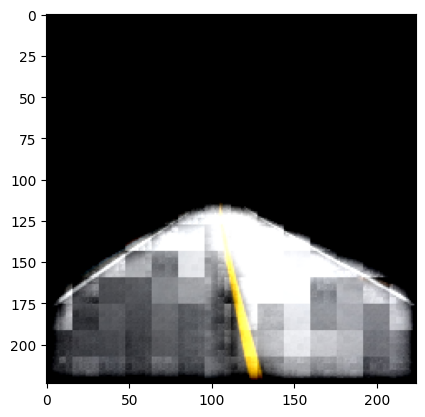

In [115]:
import matplotlib.pyplot as plt

plt.imshow((resize(tp(image)) + logits).permute(1, 2, 0).detach().numpy())

In [ ]:
.shape

torch.Size([3, 224, 224])